In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/dataset_96.csv?raw=true'
data_96 = pd.read_csv(url)
data_96 = data_96.drop(columns='Unnamed: 0')
print(data_96.shape)
data_96.head()

(20739, 120)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,28667,28204,27781,27139,26687,26333,27611,27355,27166,26848,26485,26280,25908,25577,25239,24848,24595,24276,23817,23649,23382,23084,22628,22576,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,...,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952
1,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,20023,19911,19555,19302,19122,19047,19138,19104,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,...,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,29428,29368,29593,30310,30447,30111,29755,29401
2,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,20456,20756,21105,21251,21177,21410,21634,21843,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,...,30711,30590,30722,30581,30329,30134,30023,29623,29428,29368,29593,30310,30447,30111,29755,29401,28667,28204,27781,27139,26687,26333,25834,25145,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202
3,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,...,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202,22176,22166,21877,21877,21921,21656,21931,22094,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191
4,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,...,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191,29358,31027,31593,31469,31660,32221,32357,33081,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063


In [ ]:
w = 96
h = 24

In [ ]:
X = data_96.iloc[:,:w].values.tolist()
y = data_96.iloc[:,w:].values.tolist()

In [ ]:
split = 0.7
train_len = int(split * len(X))
X_train = np.array(X[:train_len])
y_train = np.array(y[:train_len])
X_test = np.array(X[train_len:])
y_test = np.array(y[train_len:])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14517, 96) (14517, 24) (6222, 96) (6222, 24)


In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(w, ), activation='relu', name='dense_1'))
model.add(Dense(16, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# model = Sequential()
# model.add(Dense(128, input_shape=(w, ), activation='relu', name='dense_1'))
# model.add(Dense(64, activation='relu', name='dense_2'))
# model.add(Dense(16, activation='relu', name='dense_3'))
# model.add(Dense(1, activation='linear', name='dense_output'))
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 17        
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________


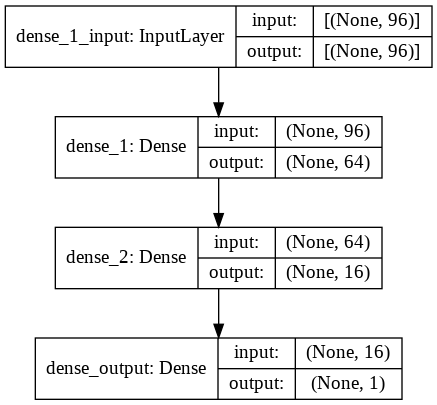

In [ ]:
import keras
dot_img_file = 'model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
full_data = np.concatenate((X_train, X_test), axis=0)
predictions = []
histories = []
for i in range(1):
    history = model.fit(X_train, y_train[:,i], epochs=50,verbose = 2)
    pred = model.predict(full_data)
    predictions.append(pred)
    histories.append(history)
    mse_nn, mae_nn = model.evaluate(X_test, y_test[:,i])
    print(f"Mean squared error on test data for h = {i+1} : {mse_nn}")
    print(f"Mean absolute error on test data for h = {i+1} : {mae_nn}")

Epoch 1/50
454/454 - 1s - loss: 754833088.0000 - mae: 26833.1602
Epoch 2/50
454/454 - 1s - loss: 233821184.0000 - mae: 13265.3848
Epoch 3/50
454/454 - 1s - loss: 108037592.0000 - mae: 8691.3740
Epoch 4/50
454/454 - 1s - loss: 73645504.0000 - mae: 6905.3130
Epoch 5/50
454/454 - 1s - loss: 62850204.0000 - mae: 6308.6440
Epoch 6/50
454/454 - 1s - loss: 54951732.0000 - mae: 5884.6416
Epoch 7/50
454/454 - 1s - loss: 47268004.0000 - mae: 5458.3726
Epoch 8/50
454/454 - 1s - loss: 40479324.0000 - mae: 5044.0620
Epoch 9/50
454/454 - 1s - loss: 35249600.0000 - mae: 4708.5181
Epoch 10/50
454/454 - 1s - loss: 31373546.0000 - mae: 4447.2378
Epoch 11/50
454/454 - 1s - loss: 28232864.0000 - mae: 4222.2363
Epoch 12/50
454/454 - 1s - loss: 25318342.0000 - mae: 3992.8252
Epoch 13/50
454/454 - 1s - loss: 22530274.0000 - mae: 3764.7798
Epoch 14/50
454/454 - 1s - loss: 19873650.0000 - mae: 3525.8096
Epoch 15/50
454/454 - 1s - loss: 17453722.0000 - mae: 3298.1897
Epoch 16/50
454/454 - 1s - loss: 15481712.00

In [ ]:
from google.colab import files
predictions = np.array(predictions)
predictions = predictions.reshape(h,-1)
df = pd.DataFrame(predictions.T)
print(df.shape)
print(df.head())
df.to_csv('ann_output_96.csv')
files.download('ann_output_96.csv')

In [ ]:
preds = np.array(df.iloc[14517:,:].values.tolist())
mae_h = np.mean(np.abs(y_test-preds),axis = 0)
print(mae_h)
np.mean(mae_h)

[160.48591377 204.12118259 232.08444236 263.34594672 304.11151113
 338.97726439 388.77167335 418.42651956 431.04724949 455.87338056
 464.37430344 450.304534   484.50253699 465.26616523 486.32695319
 516.39324298 530.28010393 580.60032696 625.19788057 598.05084466
 680.3291521  703.96642929 703.0123406  722.88660292]


467.0306875322278